# Final Project

# Predict Price of a house with Stacked Ensemble model with H2O

# Project Choice #1

http://coursera.h2o.ai/house_data.3487.csv

This is a regression problem. You have to predict "price".

You should split date into year and month columns. You can then optionally combine them into a numeric date column.

Split the data into train and test, using 0.9 for the ratio, and a seed of 123. That should give you 19,462 training rows and 2,151 test rows.

If you decide you want a valid data set, too, split that from train after doing the above split.

Your target is an RMSE below $123,000.

## Step 1

Step one is to start h2o, load your chosen data set(s) and follow the project-specific data manipulation steps.

At the end of this step you will have `train`, `test`, `x` and `y` variables, and possibly `valid` also. Check you have the correct number of rows and columns (as specified in the project description) before moving on.

In [1]:
import h2o
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from time import time

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,8 hours 23 mins
H2O cluster version:,3.13.0.3978
H2O cluster version age:,4 years and 10 days !!!
H2O cluster name:,H2O_from_python_Sandipan_Dey_xdrgjv
H2O cluster total nodes:,1
H2O cluster free memory:,1.714 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [3]:
url = "http://coursera.h2o.ai/house_data.3487.csv"
house_df = h2o.import_file(url, destination_frame = "house_data")

Parse progress: |█████████████████████████████████████████████████████████| 100%


### Preporcessing

In [4]:
house_df['year'] = house_df['date'].substring(0,4).asnumeric()
house_df['month'] = house_df['date'].substring(4,6).asnumeric()
house_df['day'] = house_df['date'].substring(6,8).asnumeric()

In [5]:
house_df = house_df.drop('date')

In [6]:
house_df.head()

id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
7.1293e+09,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
6.4141e+09,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,12,9
5.6315e+09,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
2.4872e+09,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
1.9544e+09,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18
7.23755e+09,1.225e+06,4,4.5,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,5,12
1.3214e+09,257500,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,2014,6,27
2.008e+09,291850,3,1.5,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,2015,1,15
2.4146e+09,229500,3,1,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,2015,4,15
3.7935e+09,323000,3,2.5,1890,6560,2,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015,3,12


In [7]:
house_df.describe()

Rows:21613
Cols:23




,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
type,int,int,int,real,int,int,real,int,int,int,int,int,int,int,int,int,real,real,int,int,int,int,int
mins,1000102.0,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.1559,-122.519,399.0,651.0,2014.0,1.0,1.0
mean,4580301520.864987,540088.1417665284,3.370841623097218,2.114757321982139,2079.899736269819,15106.96756581695,1.4943089807060526,0.007541757275713691,0.23430342849211097,3.4094295100171164,7.6568731781798105,1788.3906907879518,291.50904548188555,1971.0051357979064,84.4022579003377,98077.93980474674,47.56005251931665,-122.21389640494158,1986.5524915560036,12768.45565169118,2014.3229537778102,6.574422801091883,15.688196918521294
maxs,9900000190.0,7700000.0,33.0,8.0,13540.0,1651359.0,3.5,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,47.7776,-121.315,6210.0,871200.0,2015.0,12.0,31.0
sigma,2876565571.3120522,367127.19648270035,0.930061831147451,0.7701631572177408,918.4408970468095,41420.51151513551,0.5399888951423489,0.08651719772788766,0.7663175692736117,0.6507430463662044,1.1754587569743344,828.0909776519175,442.57504267746685,29.373410802386235,401.67924001917555,53.50502625747248,0.13856371024192368,0.14082834238139297,685.3913042527788,27304.179631338524,0.4676160310451536,3.1153077787263648,8.635062534286034
zeros,0,0,13,10,0,0,0,21450,19489,0,0,0,13126,0,20699,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,7129300520.0,221900.0,3.0,1.0,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,2014.0,10.0,13.0
1,6414100192.0,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.721000000000004,-122.319,1690.0,7639.0,2014.0,12.0,9.0
2,5631500400.0,180000.0,2.0,1.0,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,2015.0,2.0,25.0


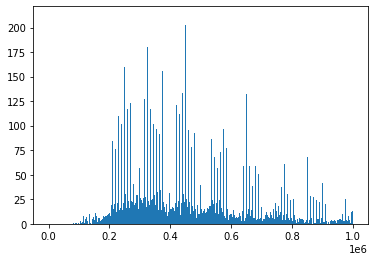

In [8]:
plt.hist(house_df.as_data_frame()['price'].tolist(), bins=np.linspace(0,10**6,1000))
plt.show()

We shall use cross-validation and not a validation dataset.

In [9]:
train, test = house_df.split_frame(ratios=[0.9], destination_frames = ['train', 'test'], seed=123)

In [10]:
print("%d/%d" %(train.nrows, test.nrows))

19462/2151


In [11]:
ignore_fields = ['id', 'price'] 
x = [i for i in train.names if not i in ignore_fields]
y = 'price'

## Step 2

Step two is to train at least four different models, using at least three different supervised algorithms. Save all your models. You may use any data engineering you wish, but must not bring in any additional external data sources.

In [12]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

In [13]:
nfolds = 5

### Model 1

In [14]:
model_GLM= H2OGeneralizedLinearEstimator(
    family='gaussian', #'gamma',
    model_id='glm_house',
    nfolds=nfolds,
    alpha=0.61,
    fold_assignment="Modulo",
    keep_cross_validation_predictions=True)
%time model_GLM.train(x, y, train)

glm Model Build progress: |███████████████████████████████████████████████| 100%
Wall time: 259 ms


In [15]:
model_GLM.cross_validation_metrics_summary().as_data_frame()

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,230053.23,715.8795,229225.16,230969.69,228503.45,230529.47,231038.42
1,mean_residual_deviance,1.31780157E11,4.5671977E9,1.32968604E11,1.41431144E11,1.31364495E11,1.32024402E11,1.21112134E11
2,mse,1.31780157E11,4.5671977E9,1.32968604E11,1.41431144E11,1.31364495E11,1.32024402E11,1.21112134E11
3,null_deviance,5.25455325E14,1.80834544E13,5.3056184E14,5.636807E14,5.23549568E14,5.26203388E14,4.83281095E14
4,r2,0.023522535,4.801036E-4,0.024299357,0.023168933,0.022531934,0.023340257,0.024272196
5,residual_deviance,5.12943247E14,1.7808912E13,5.17646773E14,5.5059142E14,5.11270625E14,5.13838982E14,4.71368433E14
6,rmse,362905.53,6314.0225,364648.6,376073.3,362442.4,363351.62,348011.7
7,rmsle,0.53911585,0.0047404445,0.54277176,0.5389013,0.5275475,0.53846484,0.54789394


In [16]:
model_GLM.model_performance(test)


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 128806123545.59714
RMSE: 358895.7000934911
MAE: 233890.6933813204
RMSLE: 0.5456714021880726
R^2: 0.03102347771355851
Mean Residual Deviance: 128806123545.59714
Null degrees of freedom: 2150
Residual degrees of freedom: 2129
Null deviance: 285935013037402.7
Residual deviance: 277061971746579.44
AIC: 61176.23965800522


The best performing $\alpha$ hyperparameter value for GLM was found using *GridSearch*. As can be seen from above, GLM could not achieve the target of RMSE below $123k neither on cross-validation nor on test dataset.

The below models (**GBM**, **DRF** and **DL**) and the corresponding parameters were found with **AutoML leaderboard** and **GridSearch**, along with some manual tuning.

### Model 2

In [17]:
model_GBM = H2OGradientBoostingEstimator(
    model_id='gbm_house',
    nfolds=nfolds,
    ntrees=500,
    fold_assignment="Modulo",
    keep_cross_validation_predictions=True,
    seed=123)
%time model_GBM.train(x, y, train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Wall time: 54.9 s


In [18]:
model_GBM.cross_validation_metrics_summary().as_data_frame()

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,64136.496,912.2387,62751.688,66573.63,63946.31,63873.707,63537.137
1,mean_residual_deviance,1.38268457E10,1.43582912E9,1.24595825E10,1.75283814E10,1.2894718E10,1.43893801E10,1.18621655E10
2,mse,1.38268457E10,1.43582912E9,1.24595825E10,1.75283814E10,1.2894718E10,1.43893801E10,1.18621655E10
3,r2,0.8979097,0.0075696795,0.90857375,0.87893564,0.9040519,0.89355356,0.90443367
4,residual_deviance,1.38268457E10,1.43582912E9,1.24595825E10,1.75283814E10,1.2894718E10,1.43893801E10,1.18621655E10
5,rmse,117288.305,5928.7188,111622.5,132394.8,113554.914,119955.74,108913.57
6,rmsle,0.16441989,0.0025737707,0.16231671,0.17041409,0.15941188,0.16528262,0.16467415


As can be seen from the above table (row 5, column 1), the mean RMSE for cross-validation is 117288.305, which is below $123k.

In [19]:
model_GBM.model_performance(test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 14243079402.729088
RMSE: 119344.37315068142
MAE: 65050.344749203745
RMSLE: 0.16421689257411975
Mean Residual Deviance: 14243079402.729088


As can be seen from above, GBM could achieve the target of RMSE below $123k on test dataset.

### Model 3

In [20]:
model_RF = H2ORandomForestEstimator(
    model_id='rf_house',
    nfolds=nfolds,
    ntrees=20,
    fold_assignment="Modulo",
    keep_cross_validation_predictions=True,
    seed=123)
%time model_RF.train(x, y, train)

drf Model Build progress: |███████████████████████████████████████████████| 100%
Wall time: 13.2 s


In [21]:
model_RF.cross_validation_metrics_summary().as_data_frame()

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,72734.0,1162.9153,73242.26,75062.21,73461.65,71646.195,70257.7
1,mean_residual_deviance,1.8545494E10,2.2018921E9,1.79095654E10,2.45911347E10,1.74433321E10,1.71117425E10,1.56716954E10
2,mse,1.8545494E10,2.2018921E9,1.79095654E10,2.45911347E10,1.74433321E10,1.71117425E10,1.56716954E10
3,r2,0.8632202,0.011770816,0.8685827,0.8301549,0.8702062,0.8734147,0.8737426
4,residual_deviance,1.8545494E10,2.2018921E9,1.79095654E10,2.45911347E10,1.74433321E10,1.71117425E10,1.56716954E10
5,rmse,135742.78,7726.2373,133826.62,156815.61,132073.2,130811.86,125186.64
6,rmsle,0.18275535,0.0020155373,0.18441868,0.18689767,0.17945778,0.1833288,0.17967385


In [22]:
model_RF.model_performance(test)


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 16405336914.530426
RMSE: 128083.3202041953
MAE: 71572.37981480274
RMSLE: 0.17712324625977907
Mean Residual Deviance: 16405336914.530426


As can be seen from above, DRF just missed the target of RMSE below $123k for on both the cross-validation and on test dataset.

### Model 4

In [23]:
model_DL = H2ODeepLearningEstimator(epochs=30, 
                                       model_id='dl_house',
                                       nfolds=nfolds,
                                       stopping_rounds=7, 
                                       stopping_tolerance=0.006, 
                                       hidden=[30, 30, 30],
                                       reproducible=True,
                                       fold_assignment="Modulo",
                                       keep_cross_validation_predictions=True,
                                       seed=123
                                   )
%time model_DL.train(x, y, train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Wall time: 55.7 s


In [24]:
model_DL.cross_validation_metrics_summary().as_data_frame()

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,72458.19,1241.8936,71992.18,73569.984,75272.75,70553.38,70902.65
1,mean_residual_deviance,1.48438886E10,5.5005555E8,1.42477005E10,1.59033723E10,1.54513889E10,1.48586271E10,1.37583514E10
2,mse,1.48438886E10,5.5005555E8,1.42477005E10,1.59033723E10,1.54513889E10,1.48586271E10,1.37583514E10
3,r2,0.8899759,0.0023493338,0.89545286,0.8901592,0.885028,0.89008224,0.88915724
4,residual_deviance,1.48438886E10,5.5005555E8,1.42477005E10,1.59033723E10,1.54513889E10,1.48586271E10,1.37583514E10
5,rmse,121793.58,2259.6975,119363.734,126108.58,124303.62,121895.97,117296.0
6,rmsle,0.18431115,0.0011469581,0.18251595,0.18650953,0.18453318,0.18555655,0.18244053


As can be seen from the above table (row 5, column 1), the mean RMSE for cross-validation is 121793.58, which is below $123k.

In [25]:
model_DL.model_performance(test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 14781990070.095192
RMSE: 121581.20771770278
MAE: 72522.60487846025
RMSLE: 0.1834924698171073
Mean Residual Deviance: 14781990070.095192


As can be seen from above, the deep learning model could achieve the target of RMSE below $123 on test dataset.

## Step 3

Step three is to train a stacked ensemble of the models you made in step two.

Repeat steps two and three until your best model (which is usually your ensemble model, but does not have to be) has the minimum required performance on the validation data.

Note: only one model has to achieve the minimum required performance. If multiple models achieve it, choose the best performing one to deliver.

In [26]:
models = [model_GBM.model_id, model_RF.model_id, model_DL.model_id] #model_GLM.model_id,
model_SE = H2OStackedEnsembleEstimator(model_id = 'se_gbm_dl_house', base_models=models)
%time model_SE.train(x, y, train)

stackedensemble Model Build progress: |███████████████████████████████████| 100%
Wall time: 2.67 s


In [27]:
model_SE.model_performance(test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 130916347835.45828
RMSE: 361823.6418967924
MAE: 236448.3672215734
RMSLE: 0.5514878971097109
R^2: 0.015148783736682492
Mean Residual Deviance: 130916347835.45828
Null degrees of freedom: 2150
Residual degrees of freedom: 2147
Null deviance: 285935013037402.7
Residual deviance: 281601064194070.75
AIC: 61175.193832813566


As can be seen from above, the stacked ensemble model could not reach the required performance, neither on the cross-validation, nor on the test dataset.

## Step 4

Step four is to get the performance on the test data of your chosen model/ensemble, and confirm that this also reaches the minimum target on the test data. Record your model performance in comments at the end of your script.

### Best Model

The model that performs best in terms of mean cross-validation RMSE and RMSE on the test dataset (both of them are below the minimum target $123k) is the gradient boositng model (**GBM**), which is the **Model 2** above.

In [28]:
model_GBM.model_performance(test)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 14243079402.729088
RMSE: 119344.37315068142
MAE: 65050.344749203745
RMSLE: 0.16421689257411975
Mean Residual Deviance: 14243079402.729088


In [29]:
h2o.save_model(model_GBM, 'best_model (GBM)') # the final best model
h2o.save_model(model_SE, 'SE_model')
h2o.save_model(model_GBM, 'GBM_model')
h2o.save_model(model_RF, 'RF_model')
h2o.save_model(model_GLM, 'GLM_model')
h2o.save_model(model_DL, 'DL_model')

'C:\\courses\\coursera\\H2O\\Week6\\DL_model\\dl_house'